In [194]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering
from hdbscan import HDBSCAN 
from sklearn.manifold import MDS, TSNE
import glob
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, DBSCAN, KMeans, MeanShift, SpectralClustering
import time

In [1]:
np.__version__

NameError: name 'np' is not defined

In [10]:
X = np.load('matrices_TSP/window_2_symmetricity_False_func_cos_dist_contexts.npy')
labels = [0]*1014 + [1]*977

In [11]:
model = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=2)
# model = SpectralClustering(affinity='precomputed', n_clusters=2)
# model = DBSCAN(metric='precomputed')
# model = HDBSCAN(metric='precomputed')

In [12]:
model.fit(X)

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=2,
            pooling_func=<function mean at 0x7fd2240c50d0>)

In [15]:
np.sum(model.labels_)

78

In [66]:
mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-3)

In [67]:
mds.fit(X)

MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=-3, random_state=None, verbose=0)

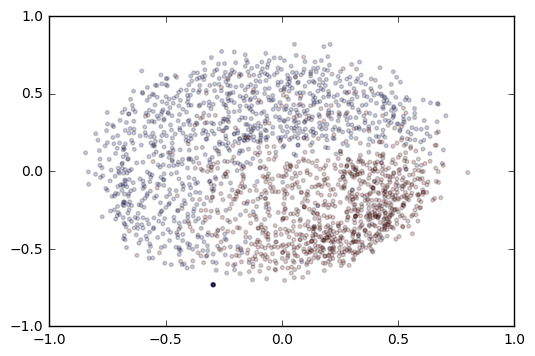

In [70]:
plt.scatter(mds.embedding_[:,0], mds.embedding_[:,1], s=7, alpha=0.2,c=np.array(labels)+5)

In [25]:
mds.embedding_[:,0]

array([-0.17655013, -0.10521658, -0.01369793, ...,  0.18525624,
        0.39520636,  0.22980502])

In [33]:
tsne = TSNE(metric='precomputed')

In [42]:
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='precomputed', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=None, verbose=0)

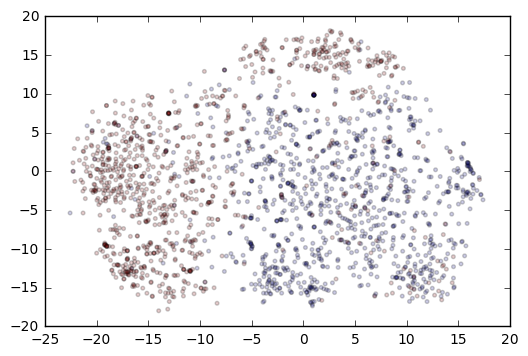

In [58]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], s=7, alpha=0.2, c=np.array(labels)+5)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2,
            pooling_func=<function mean at 0x7fd2240c50d0>)

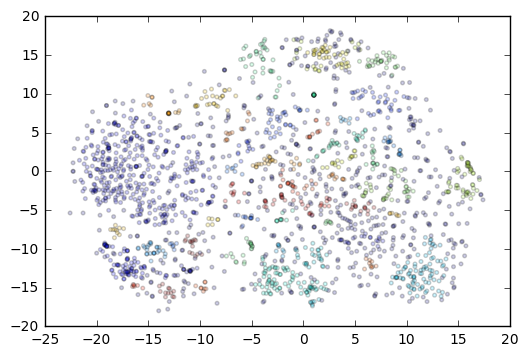

In [64]:
model = HDBSCAN()
model.fit(tsne.embedding_)
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], s=7, alpha=0.2, c=np.array(model.labels_)+5)

In [125]:
labels = {}
labels['window_2_symmetricity_True_'] = [0]*767 + [1]*627
labels['window_2_symmetricity_False'] = [0]*1014 + [1]*977
labels['window_3_symmetricity_True_'] = [0]*620 + [1]*480
labels['window_3_symmetricity_False'] = [0]*988 + [1]*939
labels['window_4_symmetricity_True_'] = [0]*474 + [1]*354
labels['window_4_symmetricity_False'] = [0]*973 + [1]*919

In [108]:
distance_matrices = glob.glob('matrices/*_dist*')
similarity_matrices = glob.glob('matrices/*_sim*')

In [295]:
len(distance_matrices)

16

In [131]:
results = {}

In [135]:
results['agglomerative'] = []
for distance_matrix in distance_matrices:
    print(distance_matrix)
    label_key = distance_matrix[9:36]
    print(label_key)
    X = np.load(distance_matrix)
    for n_clusters in [2,5,10,20,40]:
        model = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=n_clusters)
        model.fit(X)
        print(homogeneity_score(labels[label_key], model.labels_))
        results['agglomerative'].append(
            {
                'distance': distance_matrix,
                'n_clusters': n_clusters,
                'homogeneity': homogeneity_score(labels[label_key], model.labels_)
            }
        )


matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy
window_2_symmetricity_True_
0.0196845816806
0.0321821411786
0.122155038895
0.187771997102
0.482622522295
matrices/window_2_symmetricity_True_func_n_distance.npy
window_2_symmetricity_True_
0.00113327929409
0.0583505475352
0.132437620263
0.176878909923
0.220240475463
matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy
window_2_symmetricity_False
0.000516170267377
0.0020669537618
0.00450925063955
0.00942035877356
0.022943692032
matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy
window_3_symmetricity_True_
0.00076134891793
0.00305102345634
0.0145897216548
0.177905105964
0.291903120576
matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy
window_2_symmetricity_True_
0.000833424566914
0.00291170481364
0.00603229675529
0.0123200667405
0.215082954617
matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy
window_4_symmetricity_True_
0.0019770356975
0.00854282139471
0.0995951619973
0.

In [137]:
model_name = 'DBSCAN'
results[model_name] = []
for distance_matrix in distance_matrices:
    print(distance_matrix)
    label_key = distance_matrix[9:36]
    print(label_key)
    X = np.load(distance_matrix)
    model = DBSCAN(metric='precomputed')
    model.fit(X)
    n_clusters = len(set(model.labels_))
    print(homogeneity_score(labels[label_key], model.labels_))
    results[model_name].append(
        {
            'distance': distance_matrix,
            'n_clusters': n_clusters,
            'homogeneity': homogeneity_score(labels[label_key], model.labels_)
        }
    )

matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy
window_2_symmetricity_True_
0.0956267979523
matrices/window_2_symmetricity_True_func_n_distance.npy
window_2_symmetricity_True_
0.0100447892827
matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy
window_2_symmetricity_False
0.0987047860155
matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy
window_3_symmetricity_True_
7.29315912297e-16
matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy
window_2_symmetricity_True_
0.00501434472094
matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy
window_4_symmetricity_True_
8.13221385953e-16
matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy
window_3_symmetricity_True_
0.123630985315
matrices/window_2_symmetricity_False_func_n_distance.npy
window_2_symmetricity_False
0.00744661291919
matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy
window_2_symmetricity_False
0.0307178097108
matrices/window_3_symmetricity_Fals

In [181]:
model_name = 'HDBSCAN'
results[model_name] = []
for distance_matrix in distance_matrices:
    print(distance_matrix)
    label_key = distance_matrix[9:36]
    print(label_key)
    X = np.load(distance_matrix)
    model = HDBSCAN(metric='precomputed')
    model.fit(X)
    n_clusters = len(set(model.labels_))
    print(homogeneity_score(labels[label_key], model.labels_))
    results[model_name].append(
        {
            'distance': distance_matrix,
            'n_clusters': n_clusters,
            'homogeneity': homogeneity_score(labels[label_key], model.labels_)
        }
    )

matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy
window_2_symmetricity_True_
0.196224704
matrices/window_2_symmetricity_True_func_n_distance.npy
window_2_symmetricity_True_
0.163379479727
matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy
window_2_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.0738060174981
matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy
window_3_symmetricity_True_
0.0164845836112
matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy
window_2_symmetricity_True_
0.0312409056567
matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy
window_4_symmetricity_True_
0.0422813218401
matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy
window_3_symmetricity_True_
0.135265952141
matrices/window_2_symmetricity_False_func_n_distance.npy
window_2_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.0856295273868
matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy
window_2_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.0277701683667
matrices/window_3_symmetricity_False_func_n_distance.npy
window_3_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.157829166014
matrices/window_3_symmetricity_True_func_n_distance.npy
window_3_symmetricity_True_
0.144922855397
matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy
window_3_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.0784632403572
matrices/window_4_symmetricity_False_func_n_distance.npy
window_4_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.102886002621
matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy
window_3_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


0.0254361493877
matrices/window_4_symmetricity_True_func_n_distance.npy
window_4_symmetricity_True_
0.141627521467
matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy
window_4_symmetricity_False
0.0394502499526


/media/cdata-work/anaconda3/lib/python3.5/site-packages/hdbscan/hdbscan_.py:55: RuntimeWarning: invalid value encountered in double_scalars
  labels, probabilities, stabilities = get_clusters(condensed_tree, stability_dict)


In [182]:
model_name = 'spectral'
results[model_name] = []
for similarity_matrix in similarity_matrices:
    try:
        print(similarity_matrix)
        label_key = similarity_matrix[9:36]
        print(label_key)
        X = np.load(similarity_matrix)
        for n_clusters in [2,5,10,20,40]:
            model = SpectralClustering(affinity='precomputed', n_clusters=n_clusters)
            model.fit(X)
            print(homogeneity_score(labels[label_key], model.labels_))
            results[model_name].append(
                {
                    'similarity': similarity_matrix,
                    'n_clusters': n_clusters,
                    'homogeneity': homogeneity_score(labels[label_key], model.labels_)
                }
            )  
    except:    
        print('err')


matrices/window_4_symmetricity_True_func_tfidf_cos_similarities.npy
window_4_symmetricity_True_
0.0165154245952
0.331884518355
0.42783722818
0.546161426822
0.430619594702
matrices/window_2_symmetricity_True_func_n_similarity.npy
window_2_symmetricity_True_
err
matrices/window_4_symmetricity_False_func_n_similarity.npy
window_4_symmetricity_False


/media/cdata-work/anaconda3/lib/python3.5/site-packages/sklearn/utils/graph.py:172: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(w)


err
matrices/window_3_symmetricity_True_func_tfidf_cos_similarities.npy
window_3_symmetricity_True_


/media/cdata-work/anaconda3/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


0.0599516163511
0.30714489684
0.443237993463
0.531178464885
0.496865161982
matrices/window_2_symmetricity_True_func_cos_sim_contexts.npy
window_2_symmetricity_True_
0.318574125921
0.454680948637
0.447507202319
0.485161982558
0.506264752783
matrices/window_4_symmetricity_False_func_tfidf_cos_similarities.npy
window_4_symmetricity_False
0.00308334843735
0.276720106393
0.500214601149
0.554649698883
0.484323499742
matrices/window_4_symmetricity_True_func_n_similarity.npy
window_4_symmetricity_True_
err
matrices/window_3_symmetricity_False_func_cos_sim_contexts.npy
window_3_symmetricity_False
0.540502768052
0.543492372032
0.564116261851
0.465709438847
0.462531711627
matrices/window_2_symmetricity_False_func_n_similarity.npy
window_2_symmetricity_False
err
matrices/window_3_symmetricity_False_func_n_similarity.npy
window_3_symmetricity_False
err
matrices/window_3_symmetricity_True_func_cos_sim_contexts.npy
window_3_symmetricity_True_
0.245878080632
0.558136962425
0.451578073457
0.52331415180

In [140]:
X = np.load('matrices/window_2_symmetricity_True_func_n_similarity.npy')


In [183]:
# res1
np.save('results-tsp-mean-tfidf-clustering.npy', results)

In [180]:
# manifold_representations
# for distance_matrix in distance_matrices[:1]:
#     print(distance_matrix)
#     X = np.load(distance_matrix)
#     mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-3)
#     mds.fit(X)
#     np.save('MDS-2_{}'.format(distance_matrix[9:]), mds.embedding_)

for distance_matrix in distance_matrices:
    print(distance_matrix)
    X = np.load(distance_matrix)
    X[X<0] = 0
    n_components = 4
    mds = MDS(n_components=n_components, dissimilarity='precomputed', n_jobs=-3)
    mds.fit(X)
    np.save('MDS-{}_{}'.format(n_components, distance_matrix[9:]), mds.embedding_)

matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy
matrices/window_2_symmetricity_True_func_n_distance.npy
matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy
matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy
matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy
matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy
matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy
matrices/window_2_symmetricity_False_func_n_distance.npy
matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy
matrices/window_3_symmetricity_False_func_n_distance.npy
matrices/window_3_symmetricity_True_func_n_distance.npy
matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy
matrices/window_4_symmetricity_False_func_n_distance.npy
matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy
matrices/window_4_symmetricity_True_func_n_distance.npy
matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy


In [178]:
for distance_matrix in distance_matrices:
    print(distance_matrix)
    X = np.load(distance_matrix)
    X[X<0] = 0
    n_components = 2
    tsne = TSNE(n_components=n_components, metric='precomputed')
    tsne.fit(X)
    np.save('tSNE-{}_{}'.format(n_components, distance_matrix[9:]), tsne.embedding_)

matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy
matrices/window_2_symmetricity_True_func_n_distance.npy
matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy
matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy
matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy
matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy
matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy
matrices/window_2_symmetricity_False_func_n_distance.npy
matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy
matrices/window_3_symmetricity_False_func_n_distance.npy
matrices/window_3_symmetricity_True_func_n_distance.npy
matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy
matrices/window_4_symmetricity_False_func_n_distance.npy
matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy
matrices/window_4_symmetricity_True_func_n_distance.npy
matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy


In [210]:
matrix = glob.glob('manifold-matrices/MDS*')[0]
# X = np.load(matrix)
# X
for file in glob.glob('manifold-matrices/MDS*'):
    true_labels = labels[file[24:51]]
    filename = file[18:]
#     print(filename)
# print(matrix[18:]) # filename


In [314]:
models = [AffinityPropagation, AgglomerativeClustering, DBSCAN, KMeans, MeanShift, SpectralClustering]
models = [AgglomerativeClustering, DBSCAN, HDBSCAN, KMeans, SpectralClustering]

n_clusters = [AgglomerativeClustering, KMeans]
results_MDS = {}
for file in glob.glob('manifold-matrices/MDS*'):
    true_labels = labels[file[24:51]]
    filename = file[18:]
    X = np.load(file)
    print(filename)
    results_MDS[filename] = []
    for model in models:
#         print(model.__name__)
        if model in n_clusters:
            for n in [5,10,20,40]:
                cluster_model = model(n_clusters=n)
                cluster_model.fit(X)
#                 print(n)
#                 print(homogeneity_score(true_labels, cluster_model.labels_))
                results_MDS[filename].append({'model': model.__name__, 'n_clusters': n,
                                              'homogeneity': homogeneity_score(true_labels, cluster_model.labels_)})
        else:
            cluster_model = model()
            cluster_model.fit(X)
#             print(len(set(cluster_model.labels_)))
#             print(homogeneity_score(true_labels, cluster_model.labels_))
            results_MDS[filename].append({'model': model.__name__, 'n_clusters': len(set(cluster_model.labels_)),
                                              'homogeneity': homogeneity_score(true_labels, cluster_model.labels_)})

MDS-2_window_2_symmetricity_True_func_cos_dist_contexts.npy
MDS-4_window_4_symmetricity_True_func_n_distance.npy
MDS-4_window_3_symmetricity_True_func_n_distance.npy
MDS-4_window_2_symmetricity_False_func_tfidf_cos_distances.npy
MDS-4_window_4_symmetricity_True_func_tfidf_cos_distances.npy
MDS-4_window_3_symmetricity_False_func_cos_dist_contexts.npy
MDS-4_window_2_symmetricity_True_func_cos_dist_contexts.npy
MDS-2_window_3_symmetricity_True_func_tfidf_cos_distances.npy
MDS-2_window_4_symmetricity_True_func_n_distance.npy
MDS-4_window_3_symmetricity_True_func_cos_dist_contexts.npy
MDS-2_window_3_symmetricity_False_func_n_distance.npy
MDS-2_window_3_symmetricity_False_func_cos_dist_contexts.npy
MDS-4_window_3_symmetricity_False_func_tfidf_cos_distances.npy
MDS-4_window_2_symmetricity_True_func_tfidf_cos_distances.npy
MDS-2_window_2_symmetricity_False_func_tfidf_cos_distances.npy
MDS-2_window_4_symmetricity_False_func_n_distance.npy
MDS-2_window_2_symmetricity_False_func_cos_dist_contexts

In [315]:
np.save('results-MDS.npy', results_MDS)

In [322]:
models = [AffinityPropagation, AgglomerativeClustering, DBSCAN, KMeans, MeanShift, SpectralClustering]
models = [AgglomerativeClustering, DBSCAN, HDBSCAN, KMeans]

n_clusters = [AgglomerativeClustering, KMeans]
results_tSNE = {}
for file in glob.glob('manifold-matrices/tSNE-*'):
    true_labels = labels[file[25:52]]
    filename = file[19:]
    X = np.load(file)
    print(filename)
    results_tSNE[filename] = []
    for model in models:
        print(model.__name__)
        if model in n_clusters:
            for n in [5,10,20,40]:
                cluster_model = model(n_clusters=n)
                cluster_model.fit(X)
#                 print(n)
#                 print(homogeneity_score(true_labels, cluster_model.labels_))
                results_tSNE[filename].append({'model': model.__name__, 'n_clusters': n,
                                              'homogeneity': homogeneity_score(true_labels, cluster_model.labels_)})
        else:
            cluster_model = model()
            cluster_model.fit(X)
#             print(len(set(cluster_model.labels_)))
#             print(homogeneity_score(true_labels, cluster_model.labels_))
            results_tSNE[filename].append({'model': model.__name__, 'n_clusters': len(set(cluster_model.labels_)),
                                              'homogeneity': homogeneity_score(true_labels, cluster_model.labels_)})

SNE-4_window_4_symmetricity_False_func_tfidf_cos_distances.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-4_window_4_symmetricity_True_func_n_distance.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-4_window_4_symmetricity_True_func_tfidf_cos_distances.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-2_window_3_symmetricity_True_func_n_distance.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-4_window_3_symmetricity_True_func_tfidf_cos_distances.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-4_window_3_symmetricity_True_func_n_distance.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-2_window_2_symmetricity_False_func_n_distance.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-2_window_2_symmetricity_True_func_n_distance.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-4_window_2_symmetricity_False_func_tfidf_cos_distances.npy
AgglomerativeClustering
DBSCAN
HDBSCAN
KMeans
SNE-4_window_2_symmetricity_False_func_n_distance.npy
AgglomerativeClu

In [323]:
np.save('results-tSNE.npy', results_tSNE)

In [238]:
# ANALYSING RESULTS
res = np.load('results-tsp-mean-tfidf-clustering.npy')

In [245]:
res = {'DBSCAN': [{'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.09562679795227387, 'n_clusters': 3}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.010044789282701061, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.098704786015535756, 'n_clusters': 19}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 7.293159122966095e-16, 'n_clusters': 1}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0050143447209434902, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 8.1322138595288834e-16, 'n_clusters': 1}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.12363098531536948, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.0074466129191903003, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.030717809710790481, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.0021988860864478764, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.0061171434013636188, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.022137991828132267, 'n_clusters': 8}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.0018096399855733148, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.041774306235255132, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.00048663037850945446, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.0085207306705889739, 'n_clusters': 4}], 'HDBSCAN': [{'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.19622470400020633, 'n_clusters': 6}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.1633794797267849, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.073806017498070031, 'n_clusters': 17}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.016484583611220772, 'n_clusters': 4}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.031240905656733292, 'n_clusters': 6}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.042281321840140156, 'n_clusters': 3}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.13526595214067919, 'n_clusters': 3}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.085629527386768309, 'n_clusters': 3}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.027770168366686516, 'n_clusters': 9}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.15782916601383917, 'n_clusters': 6}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.1449228553972263, 'n_clusters': 4}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.078463240357206102, 'n_clusters': 11}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.10288600262115344, 'n_clusters': 4}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.025436149387691717, 'n_clusters': 5}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.14162752146739366, 'n_clusters': 3}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.039450249952607992, 'n_clusters': 15}], 'agglomerative': [{'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.01968458168057349, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.032182141178646262, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.12215503889480814, 'n_clusters': 10}, {'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.18777199710224213, 'n_clusters': 20}, {'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.48262252229547986, 'n_clusters': 40}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.0011332792940938212, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.058350547535163555, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.13243762026264178, 'n_clusters': 10}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.17687890992312671, 'n_clusters': 20}, {'distance': 'matrices/window_2_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.22024047546304226, 'n_clusters': 40}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.00051617026737726371, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.0020669537617989432, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.004509250639545207, 'n_clusters': 10}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.0094203587735558637, 'n_clusters': 20}, {'distance': 'matrices/window_2_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.022943692031972305, 'n_clusters': 40}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.00076134891793026686, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0030510234563398205, 'n_clusters': 5}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.014589721654838874, 'n_clusters': 10}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.17790510596409548, 'n_clusters': 20}, {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.29190312057569595, 'n_clusters': 40}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0008334245669138733, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0029117048136432736, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0060322967552911477, 'n_clusters': 10}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.012320066740468443, 'n_clusters': 20}, {'distance': 'matrices/window_2_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.21508295461663454, 'n_clusters': 40}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0019770356975015546, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.0085428213947079789, 'n_clusters': 5}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.099595161997270004, 'n_clusters': 10}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.16175657411918304, 'n_clusters': 20}, {'distance': 'matrices/window_4_symmetricity_True_func_tfidf_cos_distances.npy', 'homogeneity': 0.23242464460092099, 'n_clusters': 40}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.0015236342188417169, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.031618378857975679, 'n_clusters': 5}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.23720320899129582, 'n_clusters': 10}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.30855401977690006, 'n_clusters': 20}, {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy', 'homogeneity': 0.32395787084443084, 'n_clusters': 40}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.049019457312623589, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.054961871574699048, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.15191572726438049, 'n_clusters': 10}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.1592326693743201, 'n_clusters': 20}, {'distance': 'matrices/window_2_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.19971798620393061, 'n_clusters': 40}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.03534719935193379, 'n_clusters': 2}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.11967625172845417, 'n_clusters': 5}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.13960918758427129, 'n_clusters': 10}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.19837892463767906, 'n_clusters': 20}, {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.29821487511535721, 'n_clusters': 40}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.0048230622249119809, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.057817074730696034, 'n_clusters': 5}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.066019576365502528, 'n_clusters': 10}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.21703131678747342, 'n_clusters': 20}, {'distance': 'matrices/window_3_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.25738015377520745, 'n_clusters': 40}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.026021735738273918, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.03568478370482242, 'n_clusters': 5}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.1905766947071145, 'n_clusters': 10}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.27165139582965264, 'n_clusters': 20}, {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.29628892567779874, 'n_clusters': 40}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.0005005602085109116, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.0020044630344874343, 'n_clusters': 5}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.0045184093004452886, 'n_clusters': 10}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.15083703288513564, 'n_clusters': 20}, {'distance': 'matrices/window_3_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.19802320410734436, 'n_clusters': 40}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.0010155242259299831, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.043766616126796325, 'n_clusters': 5}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.093462466725714816, 'n_clusters': 10}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.19170277691132903, 'n_clusters': 20}, {'distance': 'matrices/window_4_symmetricity_False_func_n_distance.npy', 'homogeneity': 0.25977369804419609, 'n_clusters': 40}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 3.6462308161391713e-05, 'n_clusters': 2}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.049480345724721937, 'n_clusters': 5}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.14223824314824704, 'n_clusters': 10}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.17879533535688855, 'n_clusters': 20}, {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy', 'homogeneity': 0.29697980936169477, 'n_clusters': 40}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.028902817817131842, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.033112524690283446, 'n_clusters': 5}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.17176290949585662, 'n_clusters': 10}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.22470651947138168, 'n_clusters': 20}, {'distance': 'matrices/window_4_symmetricity_True_func_n_distance.npy', 'homogeneity': 0.25477469921398543, 'n_clusters': 40}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.00050757137525094692, 'n_clusters': 2}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.074997005447948212, 'n_clusters': 5}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.11761160943983928, 'n_clusters': 10}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.16251797117573749, 'n_clusters': 20}, {'distance': 'matrices/window_4_symmetricity_False_func_tfidf_cos_distances.npy', 'homogeneity': 0.25350705054631362, 'n_clusters': 40}], 'spectral': [{'similarity': 'matrices/window_4_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.016515424595190911, 'n_clusters': 2}, {'similarity': 'matrices/window_4_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.33188451835498228, 'n_clusters': 5}, {'similarity': 'matrices/window_4_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.42783722818048331, 'n_clusters': 10}, {'similarity': 'matrices/window_4_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.54616142682155611, 'n_clusters': 20}, {'similarity': 'matrices/window_4_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.4306195947024038, 'n_clusters': 40}, {'similarity': 'matrices/window_3_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.059951616351118217, 'n_clusters': 2}, {'similarity': 'matrices/window_3_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.30714489683966223, 'n_clusters': 5}, {'similarity': 'matrices/window_3_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.44323799346316456, 'n_clusters': 10}, {'similarity': 'matrices/window_3_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.5311784648847071, 'n_clusters': 20}, {'similarity': 'matrices/window_3_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.49686516198196751, 'n_clusters': 40}, {'similarity': 'matrices/window_2_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.31857412592139811, 'n_clusters': 2}, {'similarity': 'matrices/window_2_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.45468094863688185, 'n_clusters': 5}, {'similarity': 'matrices/window_2_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.4475072023190923, 'n_clusters': 10}, {'similarity': 'matrices/window_2_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.48516198255771992, 'n_clusters': 20}, {'similarity': 'matrices/window_2_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.50626475278281347, 'n_clusters': 40}, {'similarity': 'matrices/window_4_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.0030833484373502685, 'n_clusters': 2}, {'similarity': 'matrices/window_4_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.27672010639272787, 'n_clusters': 5}, {'similarity': 'matrices/window_4_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.50021460114948768, 'n_clusters': 10}, {'similarity': 'matrices/window_4_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.55464969888276439, 'n_clusters': 20}, {'similarity': 'matrices/window_4_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.48432349974212197, 'n_clusters': 40}, {'similarity': 'matrices/window_3_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.54050276805159236, 'n_clusters': 2}, {'similarity': 'matrices/window_3_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.54349237203208534, 'n_clusters': 5}, {'similarity': 'matrices/window_3_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.56411626185129549, 'n_clusters': 10}, {'similarity': 'matrices/window_3_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.46570943884749794, 'n_clusters': 20}, {'similarity': 'matrices/window_3_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.46253171162685591, 'n_clusters': 40}, {'similarity': 'matrices/window_3_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.24587808063186734, 'n_clusters': 2}, {'similarity': 'matrices/window_3_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.55813696242494304, 'n_clusters': 5}, {'similarity': 'matrices/window_3_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.45157807345656981, 'n_clusters': 10}, {'similarity': 'matrices/window_3_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.52331415180225793, 'n_clusters': 20}, {'similarity': 'matrices/window_3_symmetricity_True_func_cos_sim_contexts.npy', 'homogeneity': 0.49280137343404101, 'n_clusters': 40}, {'similarity': 'matrices/window_3_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.0050223199509332826, 'n_clusters': 2}, {'similarity': 'matrices/window_3_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.23040721508935297, 'n_clusters': 5}, {'similarity': 'matrices/window_3_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.46052089101072896, 'n_clusters': 10}, {'similarity': 'matrices/window_3_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.5879039286021267, 'n_clusters': 20}, {'similarity': 'matrices/window_3_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.53642149388755711, 'n_clusters': 40}, {'similarity': 'matrices/window_2_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.48215567793295289, 'n_clusters': 2}, {'similarity': 'matrices/window_2_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.5150087861815158, 'n_clusters': 5}, {'similarity': 'matrices/window_2_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.5317318913479141, 'n_clusters': 10}, {'similarity': 'matrices/window_2_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.49152923144229937, 'n_clusters': 20}, {'similarity': 'matrices/window_2_symmetricity_False_func_cos_sim_contexts.npy', 'homogeneity': 0.48946469500289608, 'n_clusters': 40}, {'similarity': 'matrices/window_2_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.16815342098485778, 'n_clusters': 2}, {'similarity': 'matrices/window_2_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.22752249019262191, 'n_clusters': 5}, {'similarity': 'matrices/window_2_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.35587084349016912, 'n_clusters': 10}, {'similarity': 'matrices/window_2_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.53035249506583448, 'n_clusters': 20}, {'similarity': 'matrices/window_2_symmetricity_True_func_tfidf_cos_similarities.npy', 'homogeneity': 0.4905157949990232, 'n_clusters': 40}, {'similarity': 'matrices/window_2_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.16459016294895029, 'n_clusters': 2}, {'similarity': 'matrices/window_2_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.27122894481541271, 'n_clusters': 5}, {'similarity': 'matrices/window_2_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.28687138498721654, 'n_clusters': 10}, {'similarity': 'matrices/window_2_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.51634048661008636, 'n_clusters': 20}, {'similarity': 'matrices/window_2_symmetricity_False_func_tfidf_cos_similarities.npy', 'homogeneity': 0.5233797318770298, 'n_clusters': 40}]}

In [247]:
res.keys()

dict_keys(['spectral', 'HDBSCAN', 'agglomerative', 'DBSCAN'])

In [297]:
algorithm = 'agglomerative'
sorted(res[algorithm], key=lambda x: x['homogeneity'], reverse=True)[:10]

[{'distance': 'matrices/window_2_symmetricity_True_func_cos_dist_contexts.npy',
  'homogeneity': 0.48262252229547986,
  'n_clusters': 40},
 {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy',
  'homogeneity': 0.32395787084443084,
  'n_clusters': 40},
 {'distance': 'matrices/window_3_symmetricity_True_func_cos_dist_contexts.npy',
  'homogeneity': 0.30855401977690006,
  'n_clusters': 20},
 {'distance': 'matrices/window_2_symmetricity_False_func_cos_dist_contexts.npy',
  'homogeneity': 0.2982148751153572,
  'n_clusters': 40},
 {'distance': 'matrices/window_3_symmetricity_False_func_cos_dist_contexts.npy',
  'homogeneity': 0.29697980936169477,
  'n_clusters': 40},
 {'distance': 'matrices/window_3_symmetricity_True_func_n_distance.npy',
  'homogeneity': 0.29628892567779874,
  'n_clusters': 40},
 {'distance': 'matrices/window_3_symmetricity_True_func_tfidf_cos_distances.npy',
  'homogeneity': 0.29190312057569595,
  'n_clusters': 40},
 {'distance': 'matrices/window_

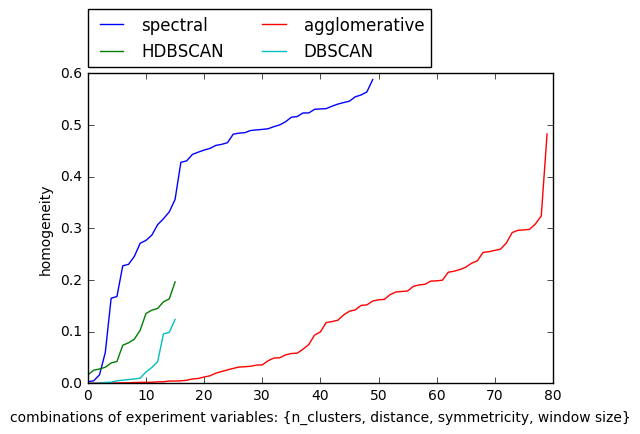

In [289]:
for algorithm in res.keys():
    dfg = [asd['homogeneity'] for asd in sorted(res[algorithm], key=lambda x: x['homogeneity'])]
    plt.xlabel('combinations of experiment variables: {n_clusters, distance, symmetricity, window size}')
    plt.ylabel('homogeneity')
#     plt.title(algorithm)
    plt.plot(dfg, label=algorithm)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, borderaxespad=0.)
plt.show()

In [357]:
res = np.load('results-MDS.npy').item()
res

{'MDS-2_window_2_symmetricity_False_func_cos_dist_contexts.npy': [{'homogeneity': 0.48255204942814844,
   'model': 'AgglomerativeClustering',
   'n_clusters': 5},
  {'homogeneity': 0.51069521825209108,
   'model': 'AgglomerativeClustering',
   'n_clusters': 10},
  {'homogeneity': 0.53893399474625525,
   'model': 'AgglomerativeClustering',
   'n_clusters': 20},
  {'homogeneity': 0.56907660710189523,
   'model': 'AgglomerativeClustering',
   'n_clusters': 40},
  {'homogeneity': -6.408449561003852e-16, 'model': 'DBSCAN', 'n_clusters': 1},
  {'homogeneity': 0.005296889846571038, 'model': 'HDBSCAN', 'n_clusters': 3},
  {'homogeneity': 0.4733667719561358, 'model': 'KMeans', 'n_clusters': 5},
  {'homogeneity': 0.49276134135408334, 'model': 'KMeans', 'n_clusters': 10},
  {'homogeneity': 0.53216748856609541, 'model': 'KMeans', 'n_clusters': 20},
  {'homogeneity': 0.58353843970714281, 'model': 'KMeans', 'n_clusters': 40},
  {'homogeneity': 0.41816526742357868,
   'model': 'SpectralClustering',
 

In [358]:
# for key, val in res.items():
#     print(val)
#     for val
resultz = []
for key, val in res.items():
    print(key, val)
    for val_i in val:
        val_i['data'] = key
        resultz.append(val_i)

MDS-2_window_4_symmetricity_True_func_n_distance.npy [{'model': 'AgglomerativeClustering', 'homogeneity': 0.4029845491603794, 'n_clusters': 5}, {'model': 'AgglomerativeClustering', 'homogeneity': 0.44822518182270249, 'n_clusters': 10}, {'model': 'AgglomerativeClustering', 'homogeneity': 0.50650586330065139, 'n_clusters': 20}, {'model': 'AgglomerativeClustering', 'homogeneity': 0.56914034626412979, 'n_clusters': 40}, {'model': 'DBSCAN', 'homogeneity': 8.1322138595288834e-16, 'n_clusters': 1}, {'model': 'HDBSCAN', 'homogeneity': 0.014739436264146992, 'n_clusters': 4}, {'model': 'KMeans', 'homogeneity': 0.40329802541050164, 'n_clusters': 5}, {'model': 'KMeans', 'homogeneity': 0.43967382773170077, 'n_clusters': 10}, {'model': 'KMeans', 'homogeneity': 0.52472010302389949, 'n_clusters': 20}, {'model': 'KMeans', 'homogeneity': 0.54531466140128404, 'n_clusters': 40}, {'model': 'SpectralClustering', 'homogeneity': 0.40886891004901066, 'n_clusters': 8}]
MDS-4_window_2_symmetricity_False_func_cos

In [355]:
# resultz
# sorted(resultz, key=lambda x: x['homogeneity'], reverse=True)

In [359]:
res2 = np.load('results-tSNE.npy').item()
res2

{'SNE-2_window_2_symmetricity_False_func_cos_dist_contexts.npy': [{'homogeneity': 0.38382017319159695,
   'model': 'AgglomerativeClustering',
   'n_clusters': 5},
  {'homogeneity': 0.48631142007005235,
   'model': 'AgglomerativeClustering',
   'n_clusters': 10},
  {'homogeneity': 0.53285707529771631,
   'model': 'AgglomerativeClustering',
   'n_clusters': 20},
  {'homogeneity': 0.57066304514126986,
   'model': 'AgglomerativeClustering',
   'n_clusters': 40},
  {'homogeneity': 0.28441926037247101, 'model': 'DBSCAN', 'n_clusters': 92},
  {'homogeneity': 0.42035901682363275, 'model': 'HDBSCAN', 'n_clusters': 76},
  {'homogeneity': 0.39514078129880803, 'model': 'KMeans', 'n_clusters': 5},
  {'homogeneity': 0.49214605567975972, 'model': 'KMeans', 'n_clusters': 10},
  {'homogeneity': 0.55592122091465146, 'model': 'KMeans', 'n_clusters': 20},
  {'homogeneity': 0.56804155254983957, 'model': 'KMeans', 'n_clusters': 40}],
 'SNE-2_window_2_symmetricity_False_func_n_distance.npy': [{'homogeneity':

In [360]:
resultz2 = []
for key, val in res2.items():
    print(key, val)
    for val_i in val:
        val_i['data'] = key
        resultz2.append(val_i)

SNE-2_window_3_symmetricity_True_func_tfidf_cos_distances.npy [{'model': 'AgglomerativeClustering', 'homogeneity': 0.16236951650459649, 'n_clusters': 5}, {'model': 'AgglomerativeClustering', 'homogeneity': 0.17528521547668288, 'n_clusters': 10}, {'model': 'AgglomerativeClustering', 'homogeneity': 0.22253251204147209, 'n_clusters': 20}, {'model': 'AgglomerativeClustering', 'homogeneity': 0.31912788488654265, 'n_clusters': 40}, {'model': 'DBSCAN', 'homogeneity': 0.047304676442542749, 'n_clusters': 11}, {'model': 'HDBSCAN', 'homogeneity': 0.2244784653807497, 'n_clusters': 56}, {'model': 'KMeans', 'homogeneity': 0.14027993454603568, 'n_clusters': 5}, {'model': 'KMeans', 'homogeneity': 0.17109207041993293, 'n_clusters': 10}, {'model': 'KMeans', 'homogeneity': 0.22681676790331776, 'n_clusters': 20}, {'model': 'KMeans', 'homogeneity': 0.29510756557008067, 'n_clusters': 40}]
SNE-4_window_3_symmetricity_False_func_tfidf_cos_distances.npy [{'model': 'AgglomerativeClustering', 'homogeneity': 0.00

In [361]:
mds = [x['homogeneity'] for x in sorted(resultz, key=lambda x: x['homogeneity'], reverse=False)]
tsne = [x['homogeneity'] for x in sorted(resultz2, key=lambda x: x['homogeneity'], reverse=False)]

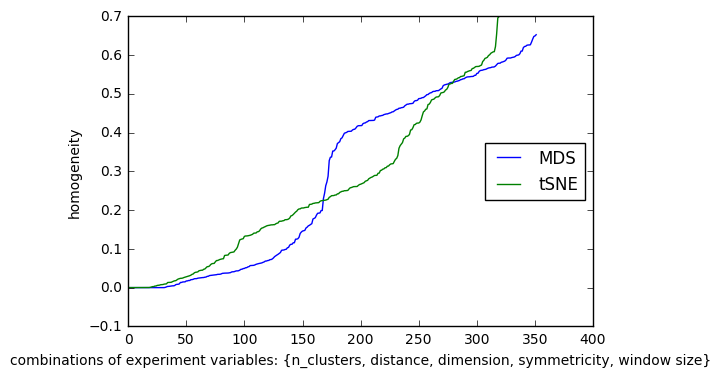

In [368]:
plt.plot(mds, label='MDS')
plt.plot(tsne, label='tSNE')
plt.legend(loc=7)
plt.xlabel('combinations of experiment variables: {n_clusters, distance, dimension, symmetricity, window size}')
plt.ylabel('homogeneity')
plt.show()

In [374]:
mds = sorted(resultz, key=lambda x: x['homogeneity'], reverse=False)
tsne = sorted(resultz2, key=lambda x: x['homogeneity'], reverse=False)
ndr = mds + tsne

In [378]:
ndr = sorted(ndr, key=lambda x: x['homogeneity'], reverse=True)

In [385]:
for rez in ndr[:30]:
    print(rez)
#     print('{:.3f}, {}, {}, {}'.format(rez['homogeneity'], rez['n_clusters'], rez['data'], rez['model']))

{'data': 'SNE-2_window_3_symmetricity_True_func_cos_dist_contexts.npy', 'model': 'KMeans', 'homogeneity': 0.69914575453863159, 'n_clusters': 40}
{'data': 'SNE-2_window_3_symmetricity_True_func_cos_dist_contexts.npy', 'model': 'AgglomerativeClustering', 'homogeneity': 0.69585074574364725, 'n_clusters': 40}
{'data': 'SNE-2_window_3_symmetricity_True_func_cos_dist_contexts.npy', 'model': 'KMeans', 'homogeneity': 0.65456244527556051, 'n_clusters': 20}
{'data': 'MDS-2_window_3_symmetricity_True_func_cos_dist_contexts.npy', 'model': 'KMeans', 'homogeneity': 0.65258390744478789, 'n_clusters': 40}
{'data': 'MDS-4_window_3_symmetricity_False_func_cos_dist_contexts.npy', 'model': 'KMeans', 'homogeneity': 0.64951697067756931, 'n_clusters': 40}
{'data': 'MDS-2_window_3_symmetricity_True_func_cos_dist_contexts.npy', 'model': 'AgglomerativeClustering', 'homogeneity': 0.64807054528188512, 'n_clusters': 40}
{'data': 'MDS-4_window_3_symmetricity_False_func_cos_dist_contexts.npy', 'model': 'Agglomerativ

In [388]:
X = np.load('manifold-matrices/tSNE-2_window_3_symmetricity_True_func_cos_dist_contexts.npy')

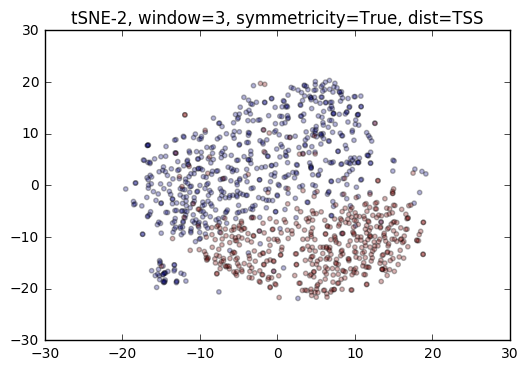

In [397]:
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.3,c=np.array(labels['window_3_symmetricity_True_'])+5)
plt.title('tSNE-2, window=3, symmetricity=True, dist=TSS')

In [398]:
X2 = np.load('manifold-matrices/MDS-2_window_3_symmetricity_True_func_cos_dist_contexts.npy')

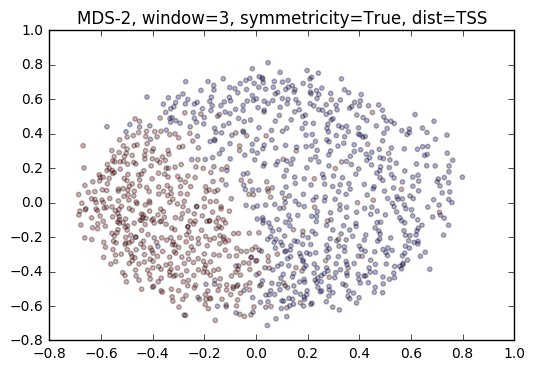

In [400]:
plt.scatter(X2[:,0], X2[:,1], s=10, alpha=0.3,c=np.array(labels['window_3_symmetricity_True_'])+5)
plt.title('MDS-2, window=3, symmetricity=True, dist=TSS')